In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tomaster import tomato
from sklearn import datasets
from rmsd import calculate_rmsd

In [120]:
filename = "data/aladip_implicit.xyz" # "data/dihedral.xyz"
coordinates = []
xyz = open(filename)
for line in xyz:
    x,y,z = line.split()
    coordinates.append([float(x), float(y), float(z)])
xyz.close()

In [121]:
coor_array = np.array(coordinates).reshape(-1,10,3)
# 1 block per 10-atom conformation each represented by 3 spatial dimensions

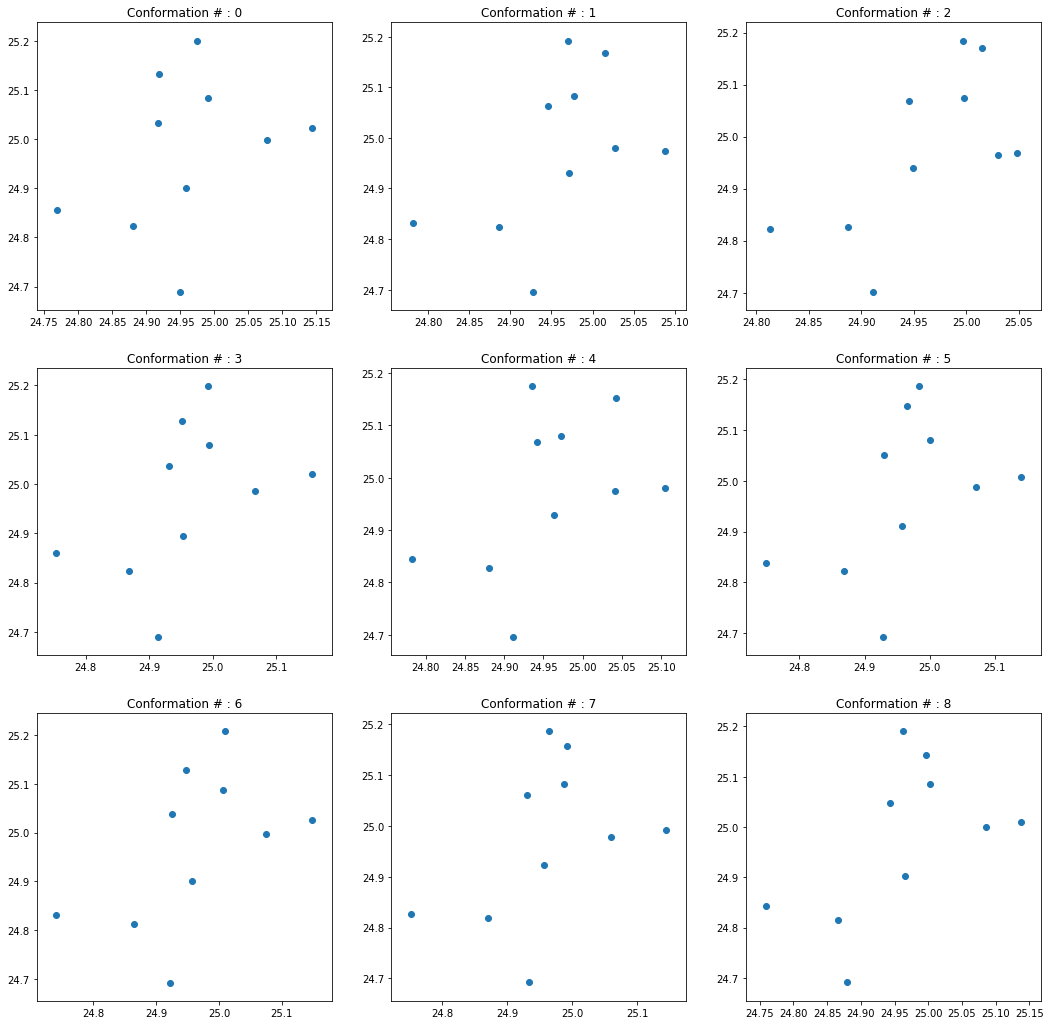

In [122]:
plt.figure(figsize=(18,18))
for conf_nb in range(9):
    plt.subplot(331+conf_nb)
    plt.scatter(coor_array[conf_nb,:,0],coor_array[conf_nb,:,1])
    plt.title('Conformation # : {}'.format(conf_nb))

Let's visualize the possible spread corresponding to each atom in the conformation :

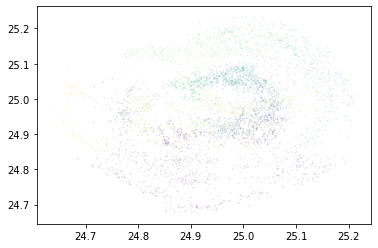

In [123]:
conf_nb = 500
colors = [i for k in range(conf_nb) for i in range(10)]
plt.scatter(coor_array[:conf_nb,:,0].reshape(-1),coor_array[:conf_nb,:,1].reshape(-1), c=colors, s=0.1, alpha=0.2)

On the figure above, a single color is associated to a single atom in the conformation, its location within each of the 100 considered conformations shows the spread (or the range of locations it can take). **However :** this is not related to the clusters we want to find ! We want to find clusters of conformations close to each other (not to clusterize the atoms within the conformations).

Thus, we need a distance to assess to what extent are conformations similar to each other :

In [9]:
dim = coor_array.shape[0]
scores = np.zeros((dim,dim))

for dim_idx1 in tqdm.tqdm(range(dim)):
    for dim_idx2 in range(dim_idx1+1, dim):
        scores[dim_idx1,dim_idx2] = calculate_rmsd.rmsd(coor_array[dim_idx1],coor_array[dim_idx1])


  0%|          | 3/1420738 [04:04<32125:37:03, 81.40s/it]

KeyboardInterrupt: 

> Outch, is too hugh by roughly $10^4$...

#### Then, let's play a bit with the implementation of ToMATo

In [124]:
filename = "ToMATo/inputs/spiral_w_density.txt" # "dihedral.xyz"
spi_dens_cors = []
xyz = open(filename)
for line in xyz:
    x,y,z = line.split()
    spi_dens_cors.append([float(x), float(y), float(z)])
xyz.close()
spi_dens_cors_arr = np.array(spi_dens_cors)

In [125]:
spi_dens_cors_arr.shape

(114562, 3)

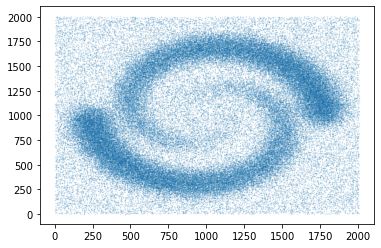

In [126]:
plt.scatter(spi_dens_cors_arr[:,0], spi_dens_cors_arr[:,1], s=0.1, alpha=0.2)

Let's play a bit with the tomato algorithm and feel the importance of its parameters :
 - k
 - n_clusters
 - tau
 - relative_tau

0 2.3303249362687986 1


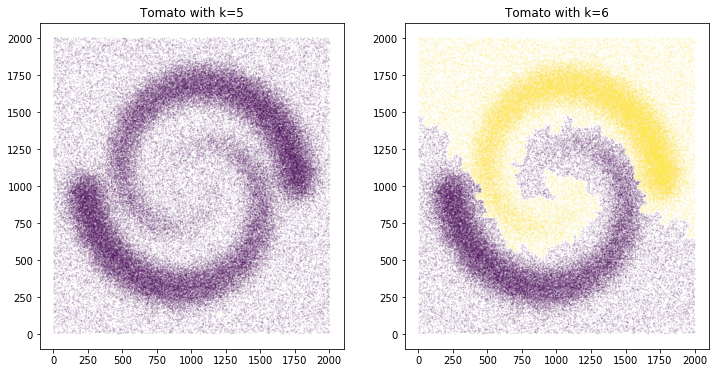

In [127]:
plt.figure(figsize=(12,6))
for rank in range(2):
    clusters, _ = tomato(spi_dens_cors_arr, k=5+rank, n_clusters=2)

    plt.subplot(121+rank)
    plt.scatter(spi_dens_cors_arr.T[0], spi_dens_cors_arr.T[1], c=clusters, s=0.1, alpha=0.2)
    plt.title("Tomato with k={}".format(5+rank))

> We easily understand that the `k` parameter is very sensitive...

0 2.3303249362687986 1
0 2.3303249362687986 1
0 1.1651624681343993 2
0 0.5825812340671996 135
0.2912906170335998 0.5825812340671996 22
0.43693592555039973 0.5825812340671996 9
0 2.3303249362687986 1
0 1.1651624681343993 2
0 0.5825812340671996 135
0.2912906170335998 0.5825812340671996 22
0.43693592555039973 0.5825812340671996 9
0.5097585798087997 0.5825812340671996 3
0.5097585798087997 0.5461699069379997 5


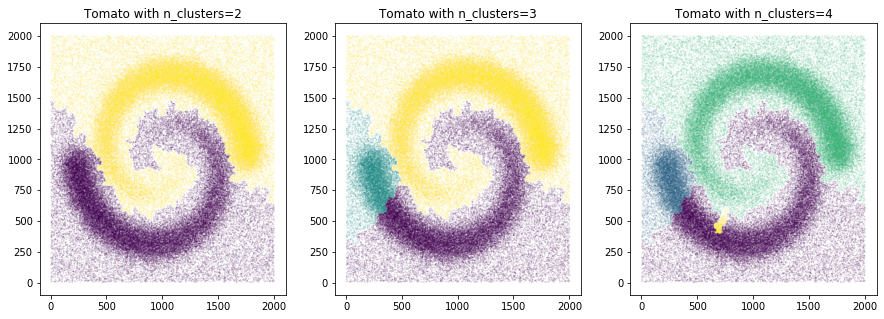

In [128]:
plt.figure(figsize=(15,5))
for rank in range(3):
    clusters, _ = tomato(spi_dens_cors_arr, k=6, n_clusters=2+rank)

    plt.subplot(131+rank)
    plt.scatter(spi_dens_cors_arr.T[0], spi_dens_cors_arr.T[1], c=clusters, s=0.1, alpha=0.2)
    plt.title("Tomato with n_clusters={}".format(2+rank))

> The `n_clusters` parameter is very important but we see on this example that the algorithm finds the main clusters first and if possible it finds others. It is also worth mentioning that the higher the value of this parameter and the more it finds noise.

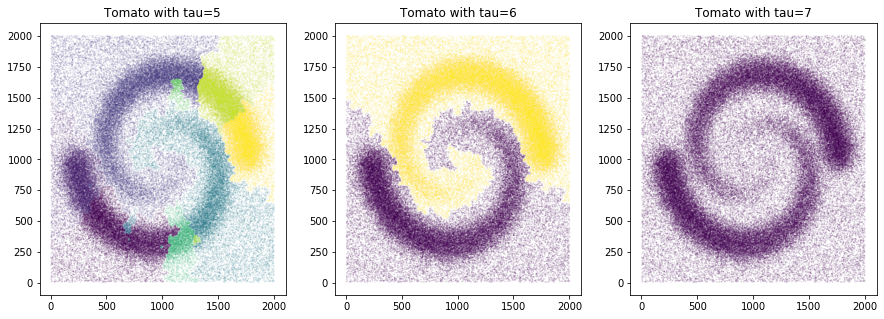

In [129]:
plt.figure(figsize=(15,5))
for rank in range(3):
    clusters = tomato(spi_dens_cors_arr, k=6, tau=rank+5)

    plt.subplot(131+rank)
    plt.scatter(spi_dens_cors_arr.T[0], spi_dens_cors_arr.T[1], c=clusters, s=0.1, alpha=0.2)
    plt.title("Tomato with tau={}".format(rank+5))

> This `tau` parameter is also very touchy...

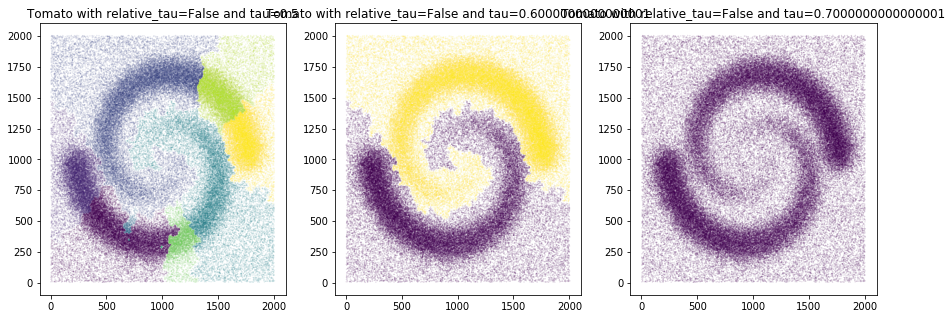

In [130]:
plt.figure(figsize=(15,5))
for rank in range(3):
    clusters = tomato(spi_dens_cors_arr, k=6, tau=.1*(5+rank), relative_tau=False) 
    # then tau is not multiplied by the standard dev

    plt.subplot(131+rank)
    plt.scatter(spi_dens_cors_arr.T[0], spi_dens_cors_arr.T[1], c=clusters, s=0.1, alpha=0.2)
    plt.title("Tomato with relative_tau=False and tau={}".format(.1*(5+rank)))

> With `relative_tau=False`, it is a bit more complicated to find the convenient value for tau... 

#### What happens when switching to another dataset ?

In [131]:
filename = "ToMATo/inputs/toy_example_w_o_density.txt" # "dihedral.xyz"
toy_ex_cors = []
xyz = open(filename)
for line in xyz:
    x,y = line.split()
    toy_ex_cors.append([float(x), float(y)])
xyz.close()

toy_ex_cors_arr = np.array(toy_ex_cors)

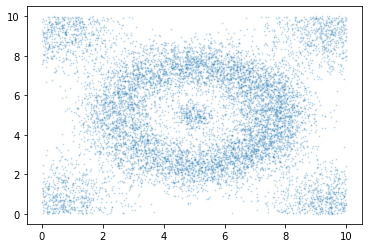

In [138]:
plt.scatter(toy_ex_cors_arr[:,0], toy_ex_cors_arr[:,1], s=0.8, alpha=0.2)

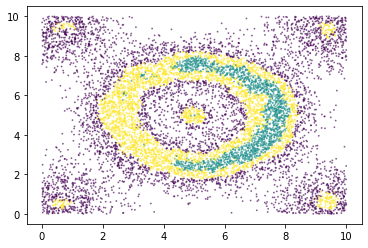

In [143]:
clusters, _ = tomato(toy_ex_dens_cors_arr, k=1000, n_clusters=6)
plt.scatter(toy_ex_dens_cors_arr.T[0], toy_ex_dens_cors_arr.T[1], c=clusters, s=0.8, alpha=0.5)

#plt.figure(figsize=(12,6))
#for rank in range(2):
#    clusters, _ = tomato(toy_ex_dens_cors_arr, k=5+rank, n_clusters=2)
#
#    plt.subplot(121+rank)
#    plt.scatter(*toy_ex_dens_cors_arr.T, c=clusters)
#    plt.title("Tomato with k={}".format(5+rank))